In [1]:
"""
工具包导入 
"""
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
"""
读取数据集
"""
train_data = pd.read_csv('data_format1/train_format1.csv')
test_data = pd.read_csv('data_format1/test_format1.csv')

user_info = pd.read_csv('data_format1/user_info_format1.csv')
user_log = pd.read_csv('data_format1/user_log_format1.csv')

In [3]:
"""
数据集样例查看 
"""
train_data

user_id  merchant_id  label
0         34176         3906      0
1         34176          121      0
2         34176         4356      1
3         34176         2217      0
4        230784         4818      0
...         ...          ...    ...
260859   359807         4325      0
260860   294527         3971      0
260861   294527          152      0
260862   294527         2537      0
260863   229247         4140      0

[260864 rows x 3 columns]

In [4]:
test_data

user_id  merchant_id  prob
0        163968         4605   NaN
1        360576         1581   NaN
2         98688         1964   NaN
3         98688         3645   NaN
4        295296         3361   NaN
...         ...          ...   ...
261472   228479         3111   NaN
261473    97919         2341   NaN
261474    97919         3971   NaN
261475    32639         3536   NaN
261476    32639         3319   NaN

[261477 rows x 3 columns]

In [5]:
user_info

user_id  age_range  gender
0        376517        6.0     1.0
1        234512        5.0     0.0
2        344532        5.0     0.0
3        186135        5.0     0.0
4         30230        5.0     0.0
...         ...        ...     ...
424165   395814        3.0     1.0
424166   245950        0.0     1.0
424167   208016        NaN     NaN
424168   272535        6.0     1.0
424169    18031        3.0     1.0

[424170 rows x 3 columns]

In [6]:
user_log

user_id  item_id  cat_id  seller_id  brand_id  time_stamp  \
0          328862   323294     833       2882    2661.0         829   
1          328862   844400    1271       2882    2661.0         829   
2          328862   575153    1271       2882    2661.0         829   
3          328862   996875    1271       2882    2661.0         829   
4          328862  1086186    1271       1253    1049.0         829   
...           ...      ...     ...        ...       ...         ...   
54925325   208016   107662     898       1346    7995.0        1110   
54925326   208016  1058313     898       1346    7995.0        1110   
54925327   208016   449814     898        983    7995.0        1110   
54925328   208016   634856     898       1346    7995.0        1110   
54925329   208016   272094     898       1346    7995.0        1111   

          action_type  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
54925325            0  
54925326            0  
54925327            0  
54925328            0  
54925329            0  

[54925330 rows x 7 columns]

In [7]:
"""
单变量数据分析 
数据类型和数据大小

用户信息数据：
1、数据集有2个float64类型和1个int64类型
2、数据大小为9.7MB
3、数据集共有424170条数据
"""
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


In [8]:
"""
用户行为数据：
1、数据集中共有6个int64类型和1个float64类型的数据
2、数据大小2.9GB
3、数据集共有54925330条数据
"""
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [9]:
"""
用户购买训练数据：
1、数据均为int64类型
2、数据大小6MB
3、数据集共有260864条数据
"""
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


In [15]:
"""
使用sklearn中的两个函数计算预测结果和预测概率
predict():返回预测结果，是标签值。
predcit_proba():预测属于某标签的概率。

简单例子
"""
from sklearn.linear_model import LogisticRegression 
import numpy as np 

# 每一个[x,x,x]表示一个用户的特征，这里是6个用户的特征数据
x_train = np.array([[1,2,3],[1,3,4],[2,1,2],[4,5,6],[3,5,3],[1,7,2]])

# 每一个0/1表示一个用户的标签正负（复购/不复购）
y_train = np.array([0,0,0,1,1,1])

# 一组测试数据，表示3个用户的特征数据
x_test = np.array([[2,2,2],[3,2,6],[1,7,4]])

clf = LogisticRegression()
clf.fit(x_train,y_train)

# 返回预测标签
print(clf.predict(x_test))

# 返回预测属于某标签的概率
print(clf.predict_proba(x_test))

[0 0 1]
[[0.87394275 0.12605725]
 [0.77045805 0.22954195]
 [0.07048027 0.92951973]]


In [16]:
"""
缺失值查看 
用户信息数据缺失
年龄缺失：
"""
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [17]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [19]:
user_info.groupby(['age_range'])[['user_id']].count()

user_id
age_range         
0.0          92914
1.0             24
2.0          52871
3.0         111654
4.0          79991
5.0          40777
6.0          35464
7.0           6992
8.0           1266

In [21]:
"""
年龄或者性别其中有一个有缺失
共计106330条数据
"""
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)| user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

In [23]:
"""
用户行为日志信息
brand_id字段有91015条缺失数据
"""
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [24]:
"""
观察数据分布
整体数据统计信息
"""
user_info.describe()

user_id      age_range         gender
count  424170.000000  421953.000000  417734.000000
mean   212085.500000       2.930262       0.341179
std    122447.476179       1.942978       0.524112
min         1.000000       0.000000       0.000000
25%    106043.250000       2.000000       0.000000
50%    212085.500000       3.000000       0.000000
75%    318127.750000       4.000000       1.000000
max    424170.000000       8.000000       2.000000

In [25]:
user_log.describe()

user_id       item_id        cat_id     seller_id      brand_id  \
count  5.492533e+07  5.492533e+07  5.492533e+07  5.492533e+07  5.483432e+07   
mean   2.121568e+05  5.538613e+05  8.770308e+02  2.470941e+03  4.153348e+03   
std    1.222872e+05  3.221459e+05  4.486269e+02  1.473310e+03  2.397679e+03   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.063360e+05  2.731680e+05  5.550000e+02  1.151000e+03  2.027000e+03   
50%    2.126540e+05  5.555290e+05  8.210000e+02  2.459000e+03  4.065000e+03   
75%    3.177500e+05  8.306890e+05  1.252000e+03  3.760000e+03  6.196000e+03   
max    4.241700e+05  1.113166e+06  1.671000e+03  4.995000e+03  8.477000e+03   

         time_stamp   action_type  
count  5.492533e+07  5.492533e+07  
mean   9.230953e+02  2.854458e-01  
std    1.954305e+02  8.075806e-01  
min    5.110000e+02  0.000000e+00  
25%    7.300000e+02  0.000000e+00  
50%    1.010000e+03  0.000000e+00  
75%    1.109000e+03  0.000000e+00  
max    1.112000e+03  3.000000e+00

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


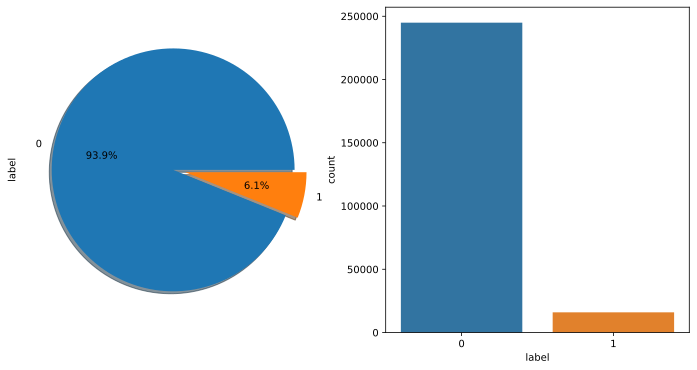

In [28]:
"""
查看正负样本的分布
"""
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot(x='label',data=train_data,ax=axe[1]) # 画直方图

In [29]:
"""
从上图可以看出，样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：
1、类似欠采样，将一份正样本和多份负样本组合成多份训练集，训练多个模型后求平均 
2、调整模型的权重
"""

'\n从上图可以看出，样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：\n1、类似欠采样，将一份正样本和多份负样本组合成多份训练集，训练多个模型后求平均 \n2、调整模型的权重\n'

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


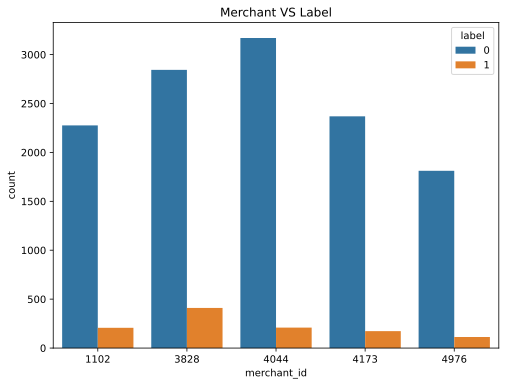

In [35]:
"""
查看店铺、用户、性别及年龄对复购的影响

查看不同商家与复购的关系
"""
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()# 数据备份
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5'] == 1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
# hue: 在x或y标签划分的同时，再以hue标签划分统计个数
ax = sns.countplot(x='merchant_id',hue='label',data=train_data_merchant)


可以看出不同店铺有不同复购率，可能与不同店铺售卖的商品有关，以及店铺的运营有关。

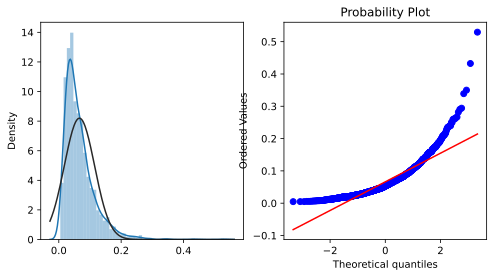

In [49]:
"""
查看店铺复购率概率分布
"""
merchant_repeat_buy = [rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0]
plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy,fit=stats.norm) # 拟合标准正态分布

ax = plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy,plot=plt)# 检验数据概率分布的方法，默认检测是正态分布
# 红色线条表示正态分布，蓝色线条表示样本数据，蓝色越接近红色参考线，说明越符合预期分布（这是是正态分布）

可以看出不同店铺有不同复购率，大致在0-0.3之间

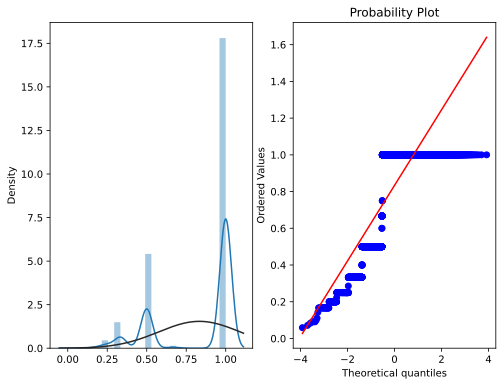

In [55]:
"""
查看用户大于一次复购概率分布
"""
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0]
plt.figure(figsize=(8,6))

ax = plt.subplot(1,2,1)
sns.distplot(user_repeat_buy,fit=stats.norm)

ax = plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy,plot=plt) 

从图中可以看出，用户复购率很小，基本买一次为主

In [56]:
# 合并表
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')

In [57]:
train_data_user_info

user_id  merchant_id  label  age_range  gender
0         34176         3906      0        6.0     0.0
1         34176          121      0        6.0     0.0
2         34176         4356      1        6.0     0.0
3         34176         2217      0        6.0     0.0
4        230784         4818      0        0.0     0.0
...         ...          ...    ...        ...     ...
260859   359807         4325      0        4.0     1.0
260860   294527         3971      0        0.0     1.0
260861   294527          152      0        0.0     1.0
260862   294527         2537      0        0.0     1.0
260863   229247         4140      0        4.0     2.0

[260864 rows x 5 columns]

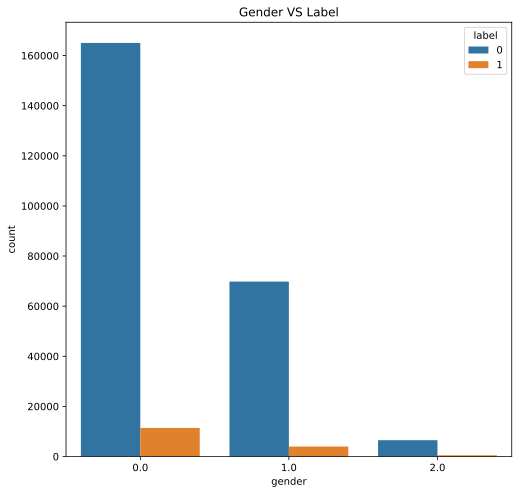

In [58]:
"""
查看用户性别与复购的关系 
"""
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot(x='gender',hue='label',data=train_data_user_info)

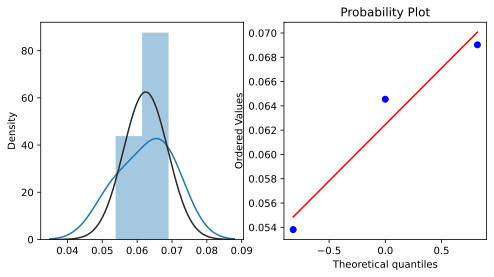

In [59]:
"""
查看用户性别复购的分布
"""
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()]

plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
sns.distplot(repeat_buy,fit=stats.norm) 
ax = plt.subplot(1,2,2)
res = stats.probplot(repeat_buy,plot=plt)

男女复购率不一样

In [61]:
"""
查看用户年龄与复购的关系
"""
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot('age_range',hue='label',data=train_data_user_info)

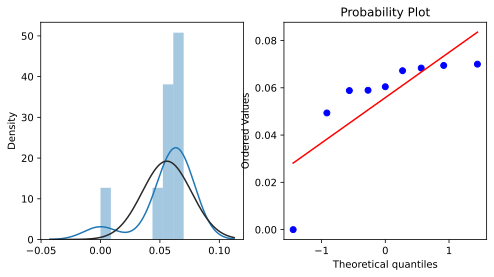

In [62]:
"""
查看用户年龄复购的分布
"""
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()]

plt.figure(figsize=(8,4))

ax = plt.subplot(1,2,1)
sns.distplot(repeat_buy,fit=stats.norm)
ax = plt.subplot(1,2,2)
res = stats.probplot(repeat_buy,plot=plt)

看出，不同年龄段用户的复购概率不同